In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np


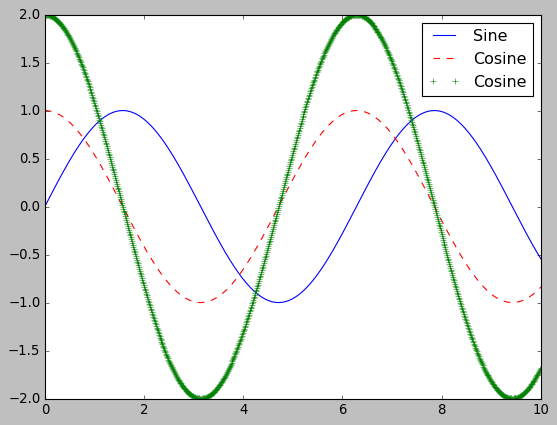

In [9]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.plot(x, 2*np.cos(x), '+g', label='Cosine')
leg = ax.legend()

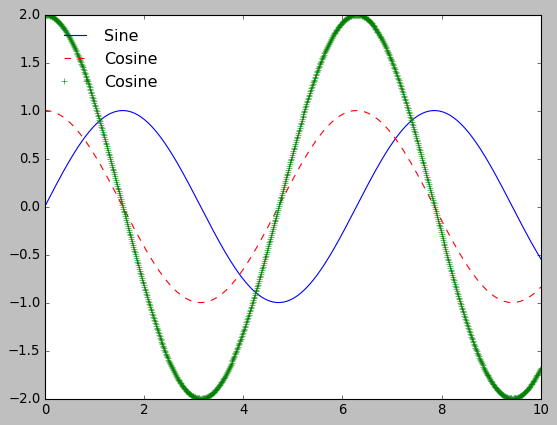

In [13]:
ax.legend(loc='upper left', frameon=False);
fig

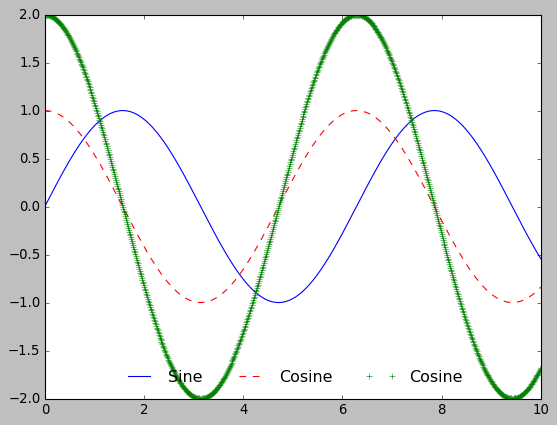

In [16]:
ax.legend(frameon=False, loc='lower center', ncol=3);
fig

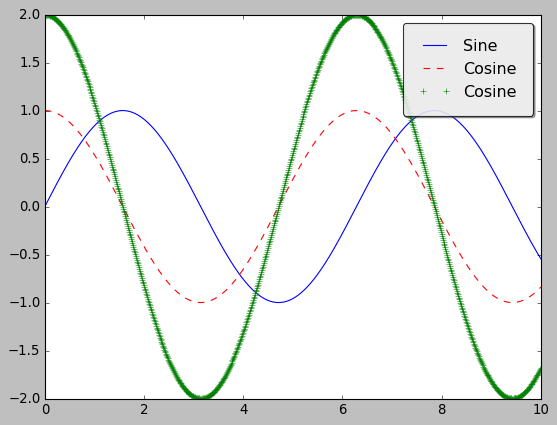

In [22]:
# fancybox rounds the corners
# framealpha adds transparency
ax.legend(fancybox=True, framealpha=0.8, shadow=True, borderpad=1);
fig

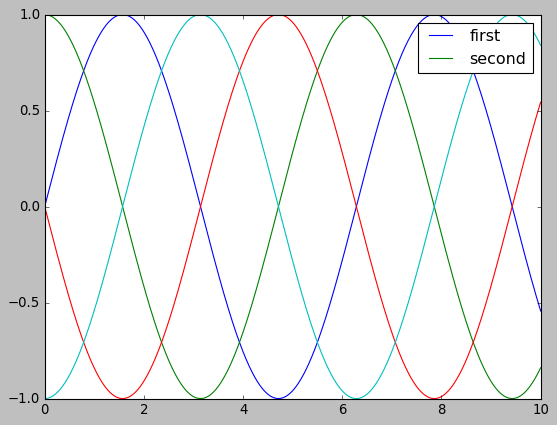

In [25]:
# we can fine-tune which elements are included in the legend!
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

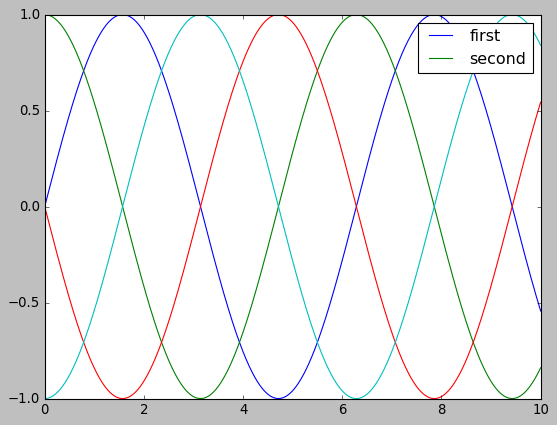

In [26]:
# but it is probably cleaner to just only add the labels to the 
# elements that you want to include in the legend
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

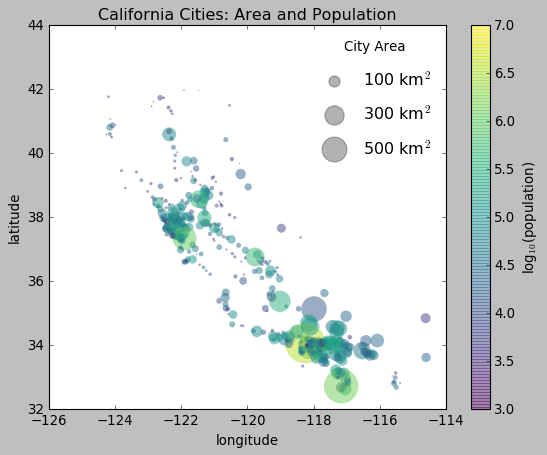

In [35]:
import pandas as pd
cities = pd.read_csv('../../data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

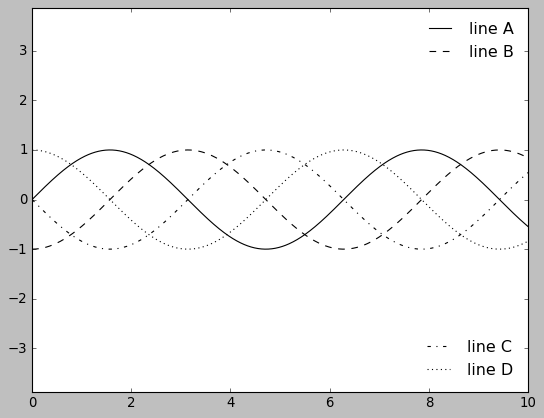

In [39]:
# matplotlib doesn't natively support multiple legends
# we workaround by creating a new legend artist from scratch

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')

ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# manually build a second legend (artist)
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg)